# Stopwords and word frequency


Let's count the frequency of the words in the Wikipedia Earth page

We use the same function to download content from wikipedia


In [2]:
import requests

def wikipedia_page(title):
    '''
    This function returns the raw text of a wikipedia page 
    given a wikipedia page title
    '''
    params = { 
        'action': 'query', 
        'format': 'json', # request json formatted content
        'titles': title, # title of the wikipedia page
        'prop': 'extracts', 
        'explaintext': True
    }
    # send a request to the wikipedia api 
    response = requests.get(
         'https://en.wikipedia.org/w/api.php',
         params= params
     ).json()

    # Parse the result
    page = next(iter(response['query']['pages'].values()))
    # return the page content 
    if 'extract' in page.keys():
        return page['extract']
    else:
        return "Page not found"


In [3]:
text = wikipedia_page('Earth').lower()

Next, we count the number of times each word is present in the text.

First we split the text over whitespaces and then use the Counter class to find the 20 most common words.

In [5]:
from collections import Counter
# we transform the text into a list of words 
# by splitting over the space character ' '
word_list = text.split(' ')
# and count the words
word_counts = Counter(word_list)

In [6]:
word_counts.most_common(20)

[('the', 638),
 ('of', 317),
 ('and', 233),
 ('is', 167),
 ('to', 153),
 ('in', 140),
 ('a', 119),
 ("earth's", 82),
 ('by', 71),
 ('from', 69),
 ('that', 68),
 ('earth', 66),
 ('as', 64),
 ('at', 57),
 ('with', 52),
 ('are', 52),
 ('on', 44),
 ('about', 43),
 ('this', 38),
 ('surface', 36)]

## Let's remove the stopwords

We define a list of stopwords, frequent words that are mostly meaningless and remove them from the text. 


In [7]:
# transform the text into a list of words
words_list = text.split(' ')
# define the list of words you want to remove from the text
stopwords = ['the', 'of', 'and', 'is','to','in','a','from','by','that', 'with', 'this', 'as', 'an', 'are','its', 'at', 'for']
# use a python list comprehension to remove the stopwords from words_list
words_without_stopwords = [ word for word in words_list if word not in stopwords ]


We get a very different list of frequent words. Much more relevant to the text.

In [9]:
Counter(words_without_stopwords).most_common(20)


[("earth's", 82),
 ('earth', 66),
 ('on', 44),
 ('about', 43),
 ('surface', 36),
 ('million', 35),
 ('solar', 31),
 ('life', 29),
 ('other', 28),
 ('it', 28),
 ('which', 27),
 ('sun', 26),
 ('have', 26),
 ('into', 25),
 ('or', 25),
 ('over', 24),
 ('has', 24),
 ('was', 21),
 ('crust', 21),
 ('atmosphere', 20)]

We can generate a wordcloud on the text with our shortlist of stopwords removed

(-0.5, 599.5, 299.5, -0.5)

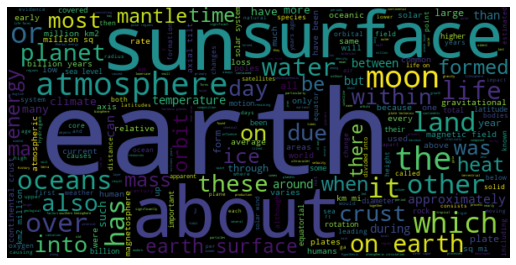

In [11]:
from wordcloud import WordCloud
# Instantiate a new wordcloud.
wordcloud = WordCloud(
        random_state = 8,
        normalize_plurals = False,
        width = 600, 
        height= 300,
        max_words = 300,
        stopwords = [])

# Transform the list of words back into a string 
text_without_stopwords  = ' '.join(words_without_stopwords)

# Apply the wordcloud to the text.
wordcloud.generate(text_without_stopwords)

# And plot
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,1, figsize = (9,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# More extensive lists of stopwords

You don't need to use default lists of stopwords. There a couple of github repos that offer much more exhaustive lists.

For instance 

* https://github.com/Alir3z4/stop-words has stopwords in several languages
* https://github.com/igorbrigadir/stopwords lists several sources of stopwords. 

